In [45]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import neattext.functions as nfx
import re
import seaborn as sns
from pandas import Series, DataFrame

In [51]:
Data = pd.read_csv('COVID.csv')
Data

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60155,"""1204309839004012544""",https://twitter.com/RevistaArgos/status/120430...,10 Dec 2019 08:00:15,El #coronavirus entérico felino es un virus in...,Tweet,Hootsuite Inc.,0,0,NaN,NaN,...,"""588410190""",Revista Argos,RevistaArgos,La revista de los veterinarios de animales de ...,Non-Verified,https://twitter.com/RevistaArgos,Non-Protected,4236,313,23 May 2012 14:30:12
60156,"""1204212528810729479""",https://twitter.com/RobNotRob11/status/1204212...,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",ReTweet,Twitter for Android,0,0,NaN,NaN,...,"""4719933867""",Serving Suggestion,RobNotRob11,"6-and-a-half-foot tall, awkwardly shaped man. ...",Non-Verified,https://twitter.com/RobNotRob11,Non-Protected,37,259,06 Jan 2016 01:12:42
60157,"""1204206609708331009""",https://twitter.com/timhquotes/status/12042066...,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",Tweet,Twitter for Android,2,28,"Jackson Hole, WY",NaN,...,"""2195288012""",Tim Heidecker Quotes,timhquotes,Quotes from our favorite weird boy. Awesome pa...,Non-Verified,https://twitter.com/timhquotes,Non-Protected,2583,822,15 Nov 2013 03:20:11
60158,"""1201998948950577152""",https://twitter.com/Baric_Lab/status/120199894...,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,Tweet,Twitter for iPhone,1,17,"Chapel Hill, NC",NaN,...,"""989521438825746433""",Baric Laboratory,Baric_Lab,"Researching SARS-CoV, MERS CoV, Dengue, Zika a...",Non-Verified,https://twitter.com/Baric_Lab,Non-Protected,1326,82,26 Apr 2018 15:07:50


In [52]:
dataset1 = pd.read_csv ('COVID.csv', usecols = ['Tweet Posted Time (UTC)','Tweet Content',
                                                'Verified or Non-Verified', 'Tweet Language'])
dataset1.rename(columns = {'Tweet Type':'Tweet_Type', 'Tweet Language':'Tweet_Language', 
                            'Verified or Non-Verified':'Verification'}, inplace = True)
dataset1
dataclean2 = dataset1[(dataset1.Tweet_Language == 'English')]
dataclean2

,Tweet Posted Time (UTC),Tweet Content,Tweet_Language,Verification
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,English,Verified
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,English,Verified
2,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",English,Verified
3,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",English,Verified
4,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,English,Verified
...,...,...,...,...
60154,10 Dec 2019 11:49:59,"RT @timhquotes: It's my party, you're invited!...",English,Non-Verified
60156,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",English,Non-Verified
60157,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",English,Non-Verified
60158,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,English,Non-Verified


In [53]:
dataclean2.dtypes

Tweet Posted Time (UTC)    object
Tweet Content              object
Tweet_Language             object
Verification               object
dtype: object

In [56]:
def clean_tweets(text):
    # Remove mentions/handles
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweeets(RT)
    text = re.sub(r'RT[\s]+', '', text)
    # Remove urls
    text = re.sub(r'https?:/\/\S+', '', text)
    # Remove punctuations
    text = nfx.remove_puncts(text)
    # Remove multiple spaces
    text = nfx.remove_multiple_spaces(text)
    # Remove emojis
    text = nfx.remove_emojis(text)
    # Remove special characters
    text = nfx.remove_special_characters(text)
    # Convert all text to lowercase
    text = text.lower()
    return text

In [57]:
dataclean2['clean_tweets'] = dataclean2['Tweet Content'].apply(clean_tweets)
dataclean2

/var/folders/xg/vs0krvvj5t1472h5jlqtcq340000gn/T/ipykernel_2072/2744873539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean2['clean_tweets'] = dataclean2['Tweet Content'].apply(clean_tweets)


,Tweet Posted Time (UTC),Tweet Content,Tweet_Language,Verification,clean_tweets
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,English,Verified,also the entire swiss football league is on ho...
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,English,Verified,world health org official trumps press confere...
2,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",English,Verified,i mean liberals are cheerleading this coronavi...
3,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",English,Verified,under repeated questioning pompeo refuses to s...
4,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,English,Verified,coronavirus comments now from kudlow here
...,...,...,...,...,...
60154,10 Dec 2019 11:49:59,"RT @timhquotes: It's my party, you're invited!...",English,Non-Verified,its my party youre invited ps this is my life...
60156,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",English,Non-Verified,its my party youre invited ps this is my life...
60157,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",English,Non-Verified,its my party youre invited ps this is my life ...
60158,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,English,Non-Verified,amys a survivor bariclab pnnl movingon coronav...


In [58]:
def getSentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    result = {'polarity' : sentiment_polarity,
              'subjectivity' : sentiment_subjectivity,
              'sentiment': sentiment_label}
    return result

In [59]:
getSentiment(dataclean2['clean_tweets'].iloc[30174])

{'polarity': -0.0625, 'subjectivity': 0.75, 'sentiment': 'Negative'}

In [69]:
dataclean2['sentiment_results'] = dataclean2['clean_tweets'].apply(getSentiment)
dataclean2

/var/folders/xg/vs0krvvj5t1472h5jlqtcq340000gn/T/ipykernel_2072/157062866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean2['sentiment_results'] = dataclean2['clean_tweets'].apply(getSentiment)


,Tweet Posted Time (UTC),Tweet Content,Tweet_Language,Verification,clean_tweets,sentiment_results
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,English,Verified,also the entire swiss football league is on ho...,"{'polarity': -0.049999999999999996, 'subjectiv..."
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,English,Verified,world health org official trumps press confere...,"{'polarity': 0.21904761904761905, 'subjectivit..."
2,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",English,Verified,i mean liberals are cheerleading this coronavi...,"{'polarity': -0.07625, 'subjectivity': 0.61375..."
3,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",English,Verified,under repeated questioning pompeo refuses to s...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
4,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,English,Verified,coronavirus comments now from kudlow here,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
...,...,...,...,...,...,...
60154,10 Dec 2019 11:49:59,"RT @timhquotes: It's my party, you're invited!...",English,Non-Verified,its my party youre invited ps this is my life...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
60156,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",English,Non-Verified,its my party youre invited ps this is my life...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
60157,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",English,Non-Verified,its my party youre invited ps this is my life ...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
60158,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,English,Non-Verified,amys a survivor bariclab pnnl movingon coronav...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [68]:
data4 = pd.json_normalize(dataclean2['sentiment_results'])
data4

,polarity,subjectivity,sentiment
0,-0.050000,0.325000,Negative
1,0.219048,0.412698,Positive
2,-0.076250,0.613750,Negative
3,0.000000,0.000000,Neutral
4,0.000000,0.000000,Neutral
...,...,...,...
33169,0.000000,0.000000,Neutral
33170,0.000000,0.000000,Neutral
33171,0.000000,0.000000,Neutral
33172,0.000000,0.000000,Neutral


In [62]:
data4['sentiment'].value_counts()

Positive    16007
Neutral     10297
Negative     6870
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

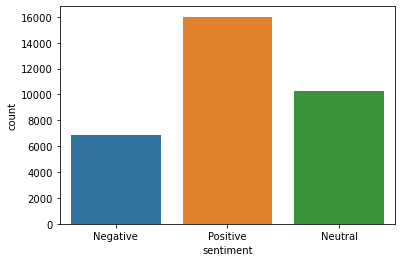

In [80]:
sns.countplot(x="sentiment", data=data4)

In [23]:
df3 = dataclean2.loc[dataclean2['Tweet Content'].str.contains("blame china", case=False)]
len(df3.index)

3

In [24]:
df3 = dataclean2.loc[dataclean2['Tweet Content'].str.contains("chinese virus", case=False)]
len(df3.index)

11

In [25]:
df3 = dataclean2.loc[dataclean2['Tweet Content'].str.contains("#kungflu", case=False)]
len(df3.index)

1

In [42]:
df3 = dataclean2.loc[dataclean2['Tweet Content'].str.contains("ccpvirus", case=False)]
len(df3.index)

1

In [27]:
df3 = dataclean2.loc[dataclean2['Tweet Content'].str.contains("#wuhanvirus", case=False)]
len(df3.index)

314

In [86]:
df = pd.read_csv('random_df.csv', usecols=['user_verified','date','text','source'])
df.rename(columns = {'text':'Tweet Content', 'user_verified':'Verified or Non-verified', 'date':'Tweet Posted Time (UTC)', 'source':'Client'}, inplace = True)
df = df.reindex(columns=['Tweet Posted Time (UTC)', 'Tweet Content', 'Verified or Non-verified'])
df2 = df.dropna()
df2

,Tweet Posted Time (UTC),Tweet Content,Verified or Non-verified
0,2020-08-04 07:54:21,"#Nigeria #COVID19 #Update Tuesday, August 4th ...",False
1,2020-07-27 03:29:54,#NOVACYT #COVID19 #ATOTHIS #NCYT #ALNOV #PRIME...,False
2,2020-07-27 05:08:44,#onlineeducation is here to stay: to make the ...,False
3,2020-08-08 13:45:40,More DEATH from #COVID19 then in all of WW2 \n...,False
4,2020-08-06 15:55:08,The #COVID19 pandemic has created opportunity ...,False
...,...,...,...
33172,2020-08-29 22:45:26,#COVID19 exposures have been reported on anoth...,True
33173,2020-07-31 18:00:00,Black people are dying from #COVID19 at 2.5 ti...,False
33174,2020-08-14 05:47:46,#CoronaInfoCH #COVID19 #corona #us \nMost Reco...,False
33175,2020-07-25 12:08:51,"10,000+ #healthworkers have been infected with...",False


In [82]:
df2['clean_tweets'] = df2['Tweet Content'].apply(clean_tweets)
df2

/var/folders/xg/vs0krvvj5t1472h5jlqtcq340000gn/T/ipykernel_2072/4219624945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clean_tweets'] = df2['Tweet Content'].apply(clean_tweets)


,Tweet Posted Time (UTC),Tweet Content,Verified or Non-verified,clean_tweets,sentiment_results
0,2020-08-04 07:54:21,"#Nigeria #COVID19 #Update Tuesday, August 4th ...",False,nigeria covid19 update tuesday august 4th 2020...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
1,2020-07-27 03:29:54,#NOVACYT #COVID19 #ATOTHIS #NCYT #ALNOV #PRIME...,False,novacyt covid19 atothis ncyt alnov primerdesig...,"{'polarity': 0.0, 'subjectivity': 1.0, 'sentim..."
2,2020-07-27 05:08:44,#onlineeducation is here to stay: to make the ...,False,onlineeducation is here to stay to make the fo...,"{'polarity': 0.0, 'subjectivity': 0.125, 'sent..."
3,2020-08-08 13:45:40,More DEATH from #COVID19 then in all of WW2 \n...,False,more death from covid19 then in all of ww2,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim..."
4,2020-08-06 15:55:08,The #COVID19 pandemic has created opportunity ...,False,the covid19 pandemic has created opportunity f...,"{'polarity': 0.02500000000000001, 'subjectivit..."
...,...,...,...,...,...
33172,2020-08-29 22:45:26,#COVID19 exposures have been reported on anoth...,True,covid19 exposures have been reported on anothe...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
33173,2020-07-31 18:00:00,Black people are dying from #COVID19 at 2.5 ti...,False,black people are dying from covid19 at 25 time...,"{'polarity': -0.08333333333333333, 'subjectivi..."
33174,2020-08-14 05:47:46,#CoronaInfoCH #COVID19 #corona #us \nMost Reco...,False,coronainfoch covid19 corona us most recovered ...,"{'polarity': 0.25, 'subjectivity': 0.25, 'sent..."
33175,2020-07-25 12:08:51,"10,000+ #healthworkers have been infected with...",False,10000 healthworkers have been infected with co...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [36]:
df2['sentiment_results'] = df2['clean_tweets'].apply(getSentiment)
df2

/var/folders/xg/vs0krvvj5t1472h5jlqtcq340000gn/T/ipykernel_2072/3894490873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment_results'] = df2['clean_tweets'].apply(getSentiment)


,Tweet Posted Time (UTC),Tweet Content,Verified or Non-verified,clean_tweets,sentiment_results
0,2020-08-04 07:54:21,"#Nigeria #COVID19 #Update Tuesday, August 4th ...",False,nigeria covid19 update tuesday august 4th 2020...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
1,2020-07-27 03:29:54,#NOVACYT #COVID19 #ATOTHIS #NCYT #ALNOV #PRIME...,False,novacyt covid19 atothis ncyt alnov primerdesig...,"{'polarity': 0.0, 'subjectivity': 1.0, 'sentim..."
2,2020-07-27 05:08:44,#onlineeducation is here to stay: to make the ...,False,onlineeducation is here to stay to make the fo...,"{'polarity': 0.0, 'subjectivity': 0.125, 'sent..."
3,2020-08-08 13:45:40,More DEATH from #COVID19 then in all of WW2 \n...,False,more death from covid19 then in all of ww2,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim..."
4,2020-08-06 15:55:08,The #COVID19 pandemic has created opportunity ...,False,the covid19 pandemic has created opportunity f...,"{'polarity': 0.02500000000000001, 'subjectivit..."
...,...,...,...,...,...
33172,2020-08-29 22:45:26,#COVID19 exposures have been reported on anoth...,True,covid19 exposures have been reported on anothe...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
33173,2020-07-31 18:00:00,Black people are dying from #COVID19 at 2.5 ti...,False,black people are dying from covid19 at 25 time...,"{'polarity': -0.08333333333333333, 'subjectivi..."
33174,2020-08-14 05:47:46,#CoronaInfoCH #COVID19 #corona #us \nMost Reco...,False,coronainfoch covid19 corona us most recovered ...,"{'polarity': 0.25, 'subjectivity': 0.25, 'sent..."
33175,2020-07-25 12:08:51,"10,000+ #healthworkers have been infected with...",False,10000 healthworkers have been infected with co...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [74]:
df3 = pd.json_normalize(df2['sentiment_results'])
df3

,polarity,subjectivity,sentiment
0,0.000000,0.000000,Neutral
1,0.000000,1.000000,Neutral
2,0.000000,0.125000,Neutral
3,0.500000,0.500000,Positive
4,0.025000,0.283333,Positive
...,...,...,...
33170,0.000000,0.000000,Neutral
33171,-0.083333,0.216667,Negative
33172,0.250000,0.250000,Positive
33173,0.000000,0.000000,Neutral


In [75]:
df3['sentiment'].value_counts()

Neutral     14381
Positive    13506
Negative     5288
Name: sentiment, dtype: int64

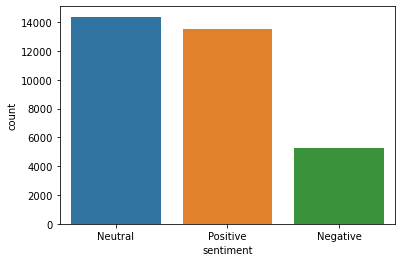

In [81]:
ax = sns.countplot(x="sentiment", data=df3)

In [ ]:
df3 = df2.loc[df2['Tweet Content'].str.contains("chinavirus", case=False)]
len(df3.index)

In [ ]:
df3 = df2.loc[df2['Tweet Content'].str.contains("chinesevirus", case=False)]
len(df3.index)

In [ ]:
df3 = df2.loc[df2['Tweet Content'].str.contains("kungflu", case=False)]
len(df3.index)

In [ ]:
df3 = df2.loc[df2['Tweet Content'].str.contains("ccpvirus", case=False)]
len(df3.index)

In [ ]:
df3 = df2.loc[df2['Tweet Content'].str.contains("wuhanvirus", case=False)]
len(df3.index)

In [83]:
data = {'Keyword': ['china virus', 'chinesevirus', 'kungflu', 'ccpvirus', 'whuhanvirus'],
        '2019-2020': [138, 112,90, 100, 314],
        '2020': [64, 56, 34, 69, 210]}

In [84]:
a = DataFrame(data)
a

,Keyword,2019-2020,2020
0,china virus,138,64
1,chinesevirus,112,56
2,kungflu,90,34
3,ccpvirus,100,69
4,whuhanvirus,314,210


<AxesSubplot:>

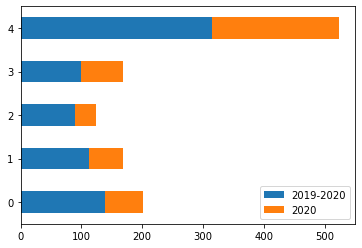

In [85]:
a.plot.barh(stacked=True)

<AxesSubplot:title={'center':'My first plot'}>

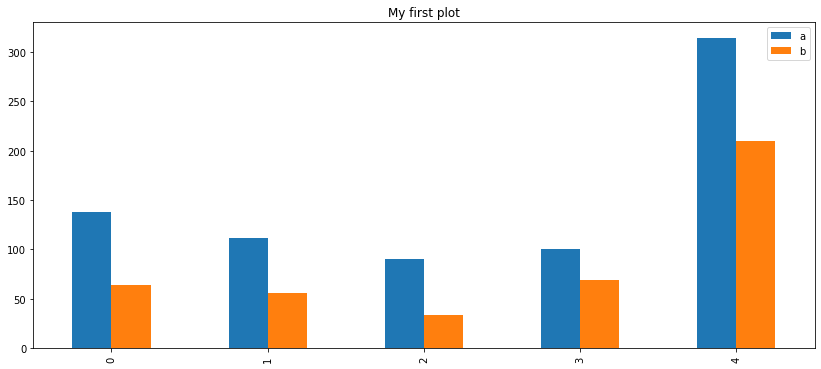

In [264]:
a.plot(
    title = 'My first plot',
    kind = 'bar',
    figsize = (14, 6)
)

<AxesSubplot:>

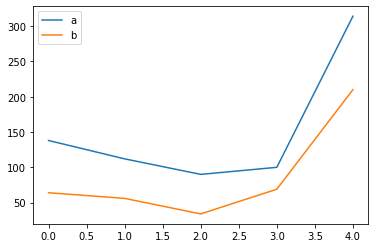

In [265]:
a.plot()